## Predicting superconducting transition temperatures from material database.

### Background

We will use materials data for superconducting materials to create machine learning models to predict the superconducting transition temperature of superconducting materials. We will not try to predict the potential of a material to be a superconductor, as this is a question that far exceeds the scope of this class project.

Your project should use as a guide the relevant sections of the paper 
**Machine learning modeling of superconducting critical temperature**
by Stanev et al.

* published: https://www.sciencedirect.com/science/article/pii/S0927025618304877
* arXiv: https://arxiv.org/abs/1709.02727

However, to simplify data collection, we will use the dataset described in the paper
**A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor**
by Kam Hamidieh 

* arXiv https://arxiv.org/abs/1803.10260
* github https://github.com/khamidieh/predict_tc/blob/master/paper_3.pdf

The dataset is available in the github project: https://github.com/khamidieh/predict_tc
This dataset is based in part on the same sources as the Stanev paper but in its final form differs considerably in the choice of variables from the data used in the Stanev paper. Hence you should not expect identical results.


### Part 1 - Read the papers

Read the papers. You are not expected to understand everything in this papers. Reading a paper for the first time requires you to skip over details and extract the most important information for your purposes.

#### Formulate 3 questions and email to the instructor. Due date: Thurday, October 23, 5pm.

Sent to Prof. Schneider.

Questions are as follow:

1. Why is the multiple regression model not used for prediction? And if it were to be used as a benchmark model, what benefit is there if it cannot be used for predicting future trends or data points? 

2. Is there a time where R is preferred over python for data science? How does python compare to using R when it comes down to analysis of data points? 

3. Is there a percentage threshold value to consider the results as useful and accurate when using ML to analyze the datasets? 

### Part 2 - Extract the dataset (optional) and read it into python data structures
The Hamidieh dataset can be downloaded as part of a github project provided by the author: https://github.com/khamidieh/predict_tc .
However the dataset is in a binary format that is not directly accessible from python. Follow the instructions in the github project to extract datafiles that can be imported into python. 

To simplify this step the data is provided in clear text format in two files (canvas for now). What information does each file contain?

**Answer**:

train.csv provides the different features and descriptions of the material.

unique_m.csv provides information on the composition of the materials of interest.

In [1]:
''' 
Data files are already downloaded from canvas as .csv, all that is left is to read it
''' 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

df_t = pd.read_csv("train.csv") # Files are already located in cwd, no need for full path 
df_um = pd.read_csv("unique_m.csv")
print(df_t)
print(df_um)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

### Part 3 - Visualization and exploration of data 

Explore and visualize the dataset. Answer  questions like:How many variables? How many entries? Which elements appear how often? Use the figures in the papers as a guide. At the minimum provide figures of superconducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

- $T_c<10K$. 
- Iron based superconductors, i.e. material composition contains $Fe$.
- HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly (but not exclusively) in a $1:2$ ratio indicating $Cu$-$O$ planes. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context. The $Cu$ $O$ ratio can deviate strongly from $1:2$ if oxygen is also present in other layers other than the $Cu$-$O$ planes.
- For each element determine for the compounds that contain it the average and standard deviation of the superconducting transition temperatures. Graph your results (2 figures)
- Plot the superconducting transition temperature against the following properties (one figure each): *mean_atomic_mass*, *range ThermalConductivity*, *range atomic radius*.

### Due date for figures and code to generate the figures is Monday 11/9.

## How many variables? How many entries? 
- Assuming variables are the columns/ features of a material
- Assuming entries are the rows for each dataset 

In [2]:
col_t = df_t.columns # or df_t.shape[1] would work as well 
col_um = df_um.columns 
row_t = df_t.shape[0] # Shape is used to prevent removal of NaNs as an entry  
row_um = df_um.shape[0] 
print(f'''For train.csv: 
# of Variables = {len(col_t)}
# of Entries = {row_t}

For unique_m.csv: 
# of Variables = {len(col_um)}
# of Entries = {row_um}''')

# Which elements appear how often? 
#print(col_um)
elements = {}
for n in np.arange(0, (len(col_um)-2)):
    elements[col_um[n]] = df_um[col_um[n]].sum()
print("\nFrequency of appearance of each element:\n")
for key, value in elements.items(): 
    print(f"{key} : {value}")


For train.csv: 
# of Variables = 82
# of Entries = 21263

For unique_m.csv: 
# of Variables = 88
# of Entries = 21263

Frequency of appearance of each element:

H : 376.02700000000004
He : 0
Li : 257.809
Be : 736.5060000000001
B : 3031.9865999999997
C : 8185.5704
N : 282.461
O : 63983.110700000005
F : 316.2708
Ne : 0
Na : 189.0655
Mg : 569.249
Al : 1311.4574
Si : 4037.6195000000002
P : 598.4069999999999
S : 2259.115
Cl : 192.439
Ar : 0
K : 341.111
Ca : 5493.222599999999
Sc : 232.167
Ti : 3334.40015
V : 4779.5486
Cr : 130.10745
Mn : 67.85525
Fe : 3257.1008500000003
Co : 751.0656
Ni : 1917.535
Cu : 27147.5476
Zn : 298.40639999999996
Ga : 1573.3990000000001
Ge : 1755.3953999999999
As : 3299.952
Se : 1672.581
Br : 83.775
Kr : 0
Rb : 165.835
Sr : 6951.0743999999995
Y : 3775.3812500000004
Zr : 7886.468499999999
Nb : 9405.673
Mo : 3112.1979
Tc : 48.714999999999996
Ru : 1176.37025
Rh : 1447.4189999999999
Pd : 1808.0687000000003
Ag : 166.57999999999998
Cd : 194.6028
In : 1051.8443
Sn : 2572.699

## Plotting the figures
At the minimum provide figures of superconducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

- $T_c<10K$. 
- Iron based superconductors, i.e. material composition contains $Fe$.
- HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly (but not exclusively) in a $1:2$ ratio indicating $Cu$-$O$ planes. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context. The $Cu$ $O$ ratio can deviate strongly from $1:2$ if oxygen is also present in other layers other than the $Cu$-$O$ planes.
- For each element determine for the compounds that contain it the average and standard deviation of the superconducting transition temperatures. Graph your results (2 figures)
- Plot the superconducting transition temperature against the following properties (one figure each): *mean_atomic_mass*, *range ThermalConductivity*, *range atomic radius*.

## Note: Superconducting Transition Temperature will be shortened to STT for aesthetic purposes

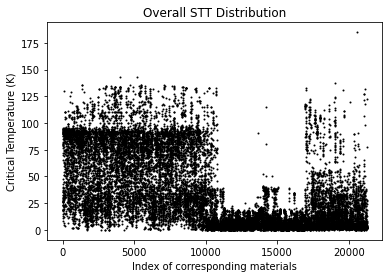

In [3]:
# Overall Superconducting Transition Temperature Distribution 
tc = df_t['critical_temp']
index = df_t.index 
plt.scatter(index, tc, color = 'black', s = 1)
plt.ylabel('Critical Temperature (K)')
plt.xlabel('Index of corresponding materials')
plt.title('Overall STT Distribution')
plt.show()


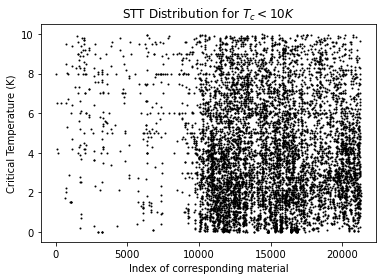

In [5]:
# Tc < 10K 
tcL10i = []
tcL10t = [] 
tcu = df_um['critical_temp']
for n in np.arange(0, tcu.shape[0]):
    if tcu[n] < 10: 
        tcL10i.append(n)
        tcL10t.append(tcu[n])
    else: 
        pass 

plt.scatter(tcL10i, tcL10t, s = 1, color = 'black')
plt.ylabel('Critical Temperature (K)')
plt.xlabel('Index of corresponding material')
plt.title('STT Distribution for $T_c<10K$')
plt.show()


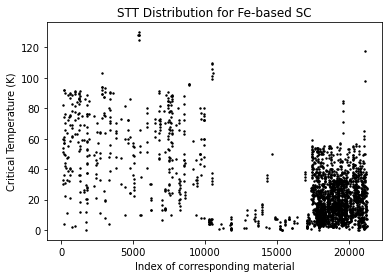

In [64]:
# Iron based superconductors
iron = df_um['Fe']
fe_i = []
fe_tc = [] 
for n in np.arange(0, tcu.shape[0]): 
    if iron[n] > 0: # Filtering out material index that contains Fe and add it to the list 
        fe_i.append(n)
        fe_tc.append(tcu[n])
    else:
        pass 
plt.scatter(fe_i, fe_tc, color = 'black', s = 2)
plt.xlabel('Index of corresponding material')
plt.ylabel('Critical Temperature (K)')
plt.title('STT Distribution for Fe-based SC')
plt.show()

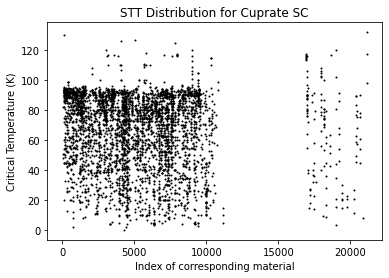

In [76]:
# Cuprate 
df_um['cuprate_ratio'] = df_um['Cu']/df_um['O'] # Creating a new column that calculate the ratio of Cu to O 
ratio = df_um['cuprate_ratio']
ratio_i = [] 
ratio_tc = [] 
for n in np.arange(0, ratio.shape[0]): 
    if ratio[n] <= 0.6 and ratio[n] >= 0.4: 
        ratio_i.append(n)
        ratio_tc.append(tcu[n])
    else: 
        pass
plt.scatter(ratio_i, ratio_tc, color = 'black', s = 1)
plt.ylabel('Critical Temperature (K)')
plt.xlabel('Index of corresponding material')
plt.title('STT Distribution for Cuprate SC')
plt.show()

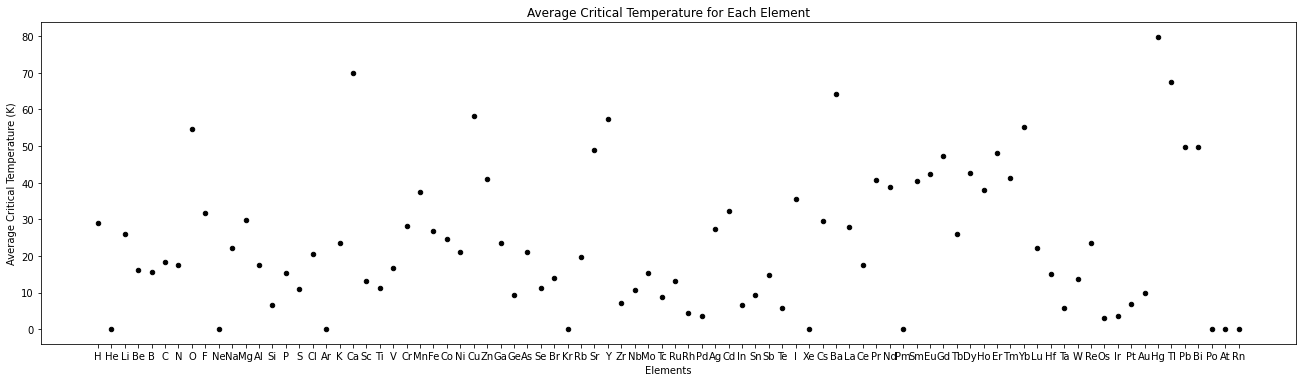

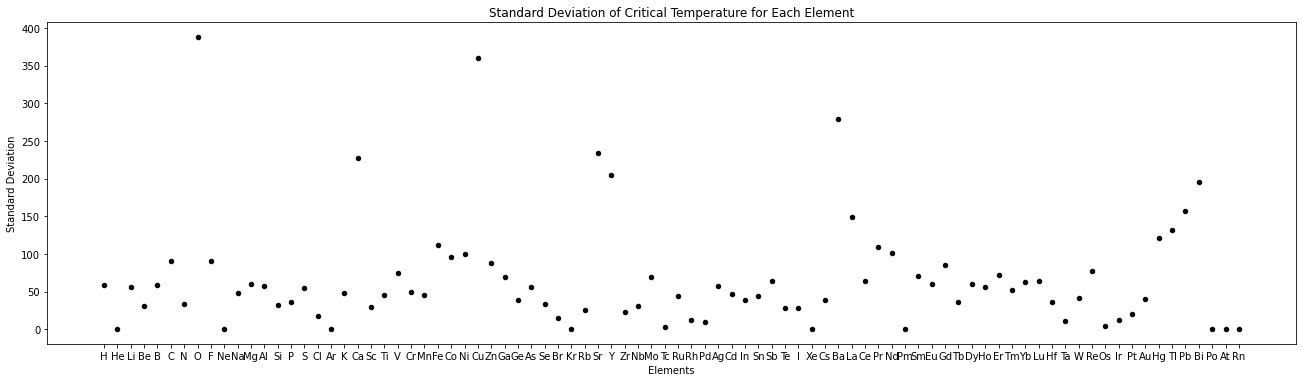

In [70]:
# Avg and Standard deviation of Tc for each element 
index_dict = {} # Storing index position of compounds that contain each element 
for element in df_um.columns[:86]:
    index_dict[element] = []
    for n in np.arange(0, tcu.shape[0]):
        if df_um[element][n] > 0:
            index_dict[element].append(n)
        else: 
            pass

# Creating data set for average critical temp 
avgtc_dict = {}
for key in index_dict: 
    avgtc_dict[key] = 0
    for n in index_dict[key]:
        avgtc_dict[key] += tcu[n]
for key in avgtc_dict: 
    if avgtc_dict[key] > 0:
        avgtc_dict[key] = avgtc_dict[key]/len(index_dict[key])
    else: 
        pass

el = list(avgtc_dict.keys())
avg_tc = list(avgtc_dict.values())

# Creating data set for standard deviation of critical temp 
sd_dict = {} 
for key in index_dict:
    sd_dict[key] = []
    count = 0
    for index in index_dict[key]:
        diff = (tcu[index] - avgtc_dict[key])**2
        sd_dict[key].append(diff)
    sd_dict[key] = np.sqrt(sum(sd_dict[key])/len(index_dict.values()))

el1 = list(sd_dict.keys())
sd = list(sd_dict.values())

# Plotting 
plt.figure(figsize = (18,5))
plt.scatter(np.arange(0,len(el)), avg_tc, s = 20, color = 'black')
plt.xticks(range(len(el)), el)
plt.tight_layout()
plt.xlabel('Elements')
plt.ylabel('Average Critical Temperature (K)')
plt.title('Average Critical Temperature for Each Element')

plt.figure(figsize = (18,5))
plt.scatter(np.arange(0,len(el1)), sd, s = 20, color = 'black')
plt.xticks(range(len(el1)), el1)
plt.tight_layout()
plt.xlabel('Elements')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Critical Temperature for Each Element')
plt.show()